

# ***Medicine Recommending system***

---

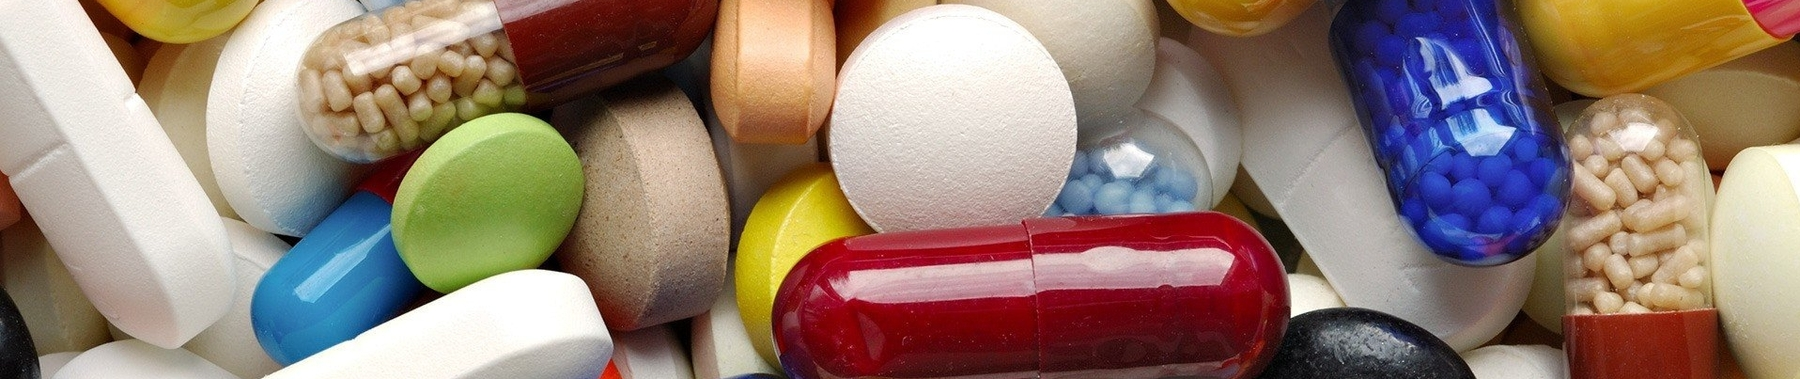







In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import pickle
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/medical data.csv", parse_dates=[0], index_col=0)

In [ ]:
df.head()

,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
Name,,,,,,
John Doe,15-05-1980,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest"
Jane Smith,10-08-1992,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan
Michael Lee,20-02-1975,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler
Emily Chen,03-11-1988,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration
Alex Wong,12-06-2001,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin


In [ ]:
df.shape

(287, 6)

In [ ]:
df = df.dropna(subset=['Symptoms','Disease','Medicine'])

In [ ]:
df.isnull().sum()

DateOfBirth    1
Gender         1
Symptoms       0
Causes         1
Disease        0
Medicine       0
dtype: int64

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Disease'].values)
input_sequences = tokenizer.texts_to_sequences(df['Disease'].values)

In [ ]:
len(input_sequences)

242

In [ ]:
with open('tokenizer.pickle','wb') as handle:
 pickle.dump(tokenizer,handle,protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
max_sequence_len = max([len(seq) for seq in input_sequences])
max_sequence_len

3

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
input_sequences_padded = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['Medicine'].values)

In [ ]:
df.duplicated().sum()

87

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [55]:
x = df.drop('Medicine',axis=1)
x.head()

,DateOfBirth,Gender,Symptoms,Causes,Disease
Name,,,,,
John Doe,15-05-1980,Male,"Fever, Cough",Viral Infection,Common Cold
Jane Smith,10-08-1992,Female,"Headache, Fatigue",Stress,Migraine
Michael Lee,20-02-1975,Male,Shortness of breath,Pollution,Asthma
Emily Chen,03-11-1988,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis
Alex Wong,12-06-2001,Male,Sore Throat,Bacterial Infection,Strep Throat


In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *['Symptoms', 'Causes'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_5, *['Gender', 'Symptoms'], **{})
chart

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
y = df['Medicine']
y

Name
John Doe             Ibuprofen, Rest
Jane Smith               Sumatriptan
Michael Lee        Albuterol Inhaler
Emily Chen          Oral Rehydration
Alex Wong                 Penicillin
                       ...          
Ava Lim            Isolation, Fluids
Liam Goh                 tihistamine
Sophie Tan      Rest, Pain Relievers
Noah Lim                 Rehydration
Ella Wong              Eye Exercises
Name: Medicine, Length: 242, dtype: object

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_sequences_padded, encoded_labels, test_size=0.30, random_state=42)

In [ ]:
x_train

array([[ 0, 35, 36],
       [ 0,  8, 13],
       [ 0,  2, 17],
       [ 0, 23, 24],
       [ 0,  0,  6],
       [ 0,  2, 17],
       [ 0,  0,  3],
       [ 0,  0, 10],
       [ 0, 27,  5],
       [ 0, 18,  1],
       [ 0,  0,  3],
       [ 0, 12,  9],
       [ 0, 35, 36],
       [ 0, 39,  5],
       [ 0, 12,  9],
       [ 0,  2, 11],
       [ 0,  0, 22],
       [ 0, 21,  5],
       [ 0, 37, 40],
       [ 0, 19, 20],
       [ 0, 12,  9],
       [ 0, 58,  6],
       [ 0,  0, 59],
       [ 0, 38, 49],
       [ 0,  0, 10],
       [ 0, 15, 16],
       [ 4,  1,  7],
       [ 0,  0,  3],
       [ 0, 15, 16],
       [ 0,  2, 11],
       [ 0,  0, 22],
       [ 0, 31, 32],
       [35, 36, 65],
       [ 0,  0,  6],
       [ 0, 28, 29],
       [ 0,  0, 41],
       [ 0, 42, 43],
       [ 0,  0, 45],
       [ 0,  8, 50],
       [ 0, 42, 43],
       [ 0, 35, 36],
       [ 0, 22, 64],
       [ 0, 39,  5],
       [ 0,  2, 17],
       [ 0,  0, 22],
       [ 0, 21,  5],
       [ 0,  0,  6],
       [ 0,  

In [ ]:
x_train.shape

(169, 3)

In [ ]:
y_train

array([45,  8, 53, 47, 41, 53, 31, 22, 28, 50, 31, 29, 45, 40, 29, 52, 20,
       56,  4, 46, 29, 41, 24, 24, 22, 39, 51, 44, 39, 52, 20, 35, 61, 41,
       27, 11, 36, 18, 62, 36, 12, 60, 40, 53, 20, 16, 41, 44, 49, 44, 49,
       39, 27, 22, 56, 28, 34,  7, 49, 51, 47, 44, 22, 41, 56, 57, 62, 38,
       56, 53, 57, 16, 35, 44, 41, 51, 32, 50, 57, 28, 51, 31, 46, 64, 55,
       57, 24, 53, 43, 52, 44,  8, 23, 22, 41, 49, 38, 44, 39, 50, 23, 23,
       51, 46, 38, 32, 32, 29, 51, 20, 37, 51, 22,  9, 32, 44, 41, 50, 47,
       50, 22, 52, 20,  5, 47, 32, 41, 51, 42, 63, 31, 46, 29, 18, 29, 28,
       41, 53, 29, 43, 20, 40, 53, 50, 56, 57, 55, 19, 23, 41, 44, 22, 20,
        9, 41, 56, 51, 46, 52, 52, 30, 38, 45, 53, 52, 26, 28, 38,  2])

In [ ]:
y_train.shape

(169,)

In [ ]:
x_test

array([[ 0, 38, 49],
       [ 0,  0, 46],
       [ 0, 18,  1],
       [ 0,  8, 13],
       [ 0, 15, 16],
       [ 0, 19, 20],
       [ 0,  0, 41],
       [ 0,  2, 11],
       [ 0, 47, 48],
       [ 0, 21,  5],
       [ 0, 12,  9],
       [ 0, 15, 16],
       [ 0, 28, 29],
       [ 0,  0, 14],
       [ 0, 19, 20],
       [ 4,  1,  7],
       [33, 34, 63],
       [ 0,  0, 53],
       [ 0,  0,  3],
       [ 0,  4,  1],
       [ 0, 15, 16],
       [ 0, 56,  9],
       [ 0, 18,  1],
       [ 0, 37, 57],
       [ 0,  0,  6],
       [ 0,  8, 13],
       [ 0,  0, 51],
       [ 0, 12,  9],
       [ 0, 28, 29],
       [ 0,  0, 14],
       [ 0,  0, 14],
       [ 4,  1,  7],
       [ 0,  0,  6],
       [ 0,  0, 10],
       [ 0,  0, 55],
       [ 0,  0, 14],
       [ 0,  0,  6],
       [ 0,  2, 11],
       [ 0, 28, 29],
       [ 0,  2, 11],
       [ 0,  0, 10],
       [ 0,  4,  1],
       [ 4,  1,  7],
       [ 0, 54,  6],
       [ 0,  8, 13],
       [ 0, 19, 20],
       [ 0, 18,  1],
       [ 0,  

In [ ]:
x_test.shape

(73, 3)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_sequence_len))
model.add(LSTM(128))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 100)            6800      
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 65)                8385      
                                                                 
Total params: 132433 (517.32 KB)
Trainable params: 132433 (517.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# ***Splitting Data:***

In [ ]:
model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/200
6/6 [==============================] - 3s 135ms/step - loss: 4.1682 - accuracy: 0.0414 - val_loss: 4.1552 - val_accuracy: 0.1644
Epoch 2/200
6/6 [==============================] - 0s 16ms/step - loss: 4.1396 - accuracy: 0.3373 - val_loss: 4.1339 - val_accuracy: 0.2192
Epoch 3/200
6/6 [==============================] - 0s 18ms/step - loss: 4.1049 - accuracy: 0.3077 - val_loss: 4.1070 - val_accuracy: 0.2055
Epoch 4/200
6/6 [==============================] - 0s 16ms/step - loss: 4.0565 - accuracy: 0.2722 - val_loss: 4.0648 - val_accuracy: 0.1644
Epoch 5/200
6/6 [==============================] - 0s 18ms/step - loss: 3.9756 - accuracy: 0.2071 - val_loss: 3.9962 - val_accuracy: 0.1370
Epoch 6/200
6/6 [==============================] - 0s 18ms/step - loss: 3.8322 - accuracy: 0.1657 - val_loss: 3.8932 - val_accuracy: 0.1096
Epoch 7/200
6/6 [==============================] - 0s 18ms/step - loss: 3.6055 - accuracy: 0.1420 - val_loss: 3.8745 - val_accuracy: 0.1096
Epoch 8/200
6/6 [==

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
y_pred_probabilities = model.predict(x_test)
y_pred_probabilities

3/3 [==============================] - 0s 5ms/step


array([[1.8621229e-06, 1.6564228e-06, 2.6194887e-06, ..., 8.5241518e-05,
        2.5874991e-08, 1.0178649e-03],
       [7.9379543e-06, 6.9040502e-06, 6.8235604e-05, ..., 6.8744720e-04,
        1.1260061e-07, 1.6266134e-04],
       [7.1213589e-07, 9.1624194e-08, 1.6325814e-06, ..., 1.9999857e-07,
        8.3154834e-09, 4.2601914e-07],
       ...,
       [1.2627740e-06, 1.5335069e-06, 7.9842169e-07, ..., 3.4394787e-05,
        5.1761016e-11, 3.4985021e-06],
       [1.2627740e-06, 1.5335069e-06, 7.9842169e-07, ..., 3.4394787e-05,
        5.1761016e-11, 3.4985021e-06],
       [1.2627742e-06, 1.5335071e-06, 7.9842175e-07, ..., 3.4394790e-05,
        5.1761019e-11, 3.4985021e-06]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

In [ ]:
for patient_idx, predicted_class in enumerate(y_pred_classes):
    print(f"Name {patient_idx + 1}: Predicted Medicine Class {predicted_class}")

Name 1: Predicted Medicine Class 24
Name 2: Predicted Medicine Class 19
Name 3: Predicted Medicine Class 50
Name 4: Predicted Medicine Class 23
Name 5: Predicted Medicine Class 39
Name 6: Predicted Medicine Class 46
Name 7: Predicted Medicine Class 11
Name 8: Predicted Medicine Class 52
Name 9: Predicted Medicine Class 24
Name 10: Predicted Medicine Class 56
Name 11: Predicted Medicine Class 29
Name 12: Predicted Medicine Class 39
Name 13: Predicted Medicine Class 27
Name 14: Predicted Medicine Class 32
Name 15: Predicted Medicine Class 46
Name 16: Predicted Medicine Class 51
Name 17: Predicted Medicine Class 49
Name 18: Predicted Medicine Class 57
Name 19: Predicted Medicine Class 44
Name 20: Predicted Medicine Class 51
Name 21: Predicted Medicine Class 39
Name 22: Predicted Medicine Class 29
Name 23: Predicted Medicine Class 50
Name 24: Predicted Medicine Class 42
Name 25: Predicted Medicine Class 41
Name 26: Predicted Medicine Class 23
Name 27: Predicted Medicine Class 24
Name 28: P

In [ ]:
y_pred=model.predict(x_test)

3/3 [==============================] - 0s 6ms/step


In [ ]:
model.save('medical.h5')

# ***Accuracy***

In [ ]:
train_acc = model.evaluate(x_train, y_train)

6/6 [==============================] - 0s 6ms/step - loss: 0.2272 - accuracy: 0.8994


### ***Testing Data***





In [56]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained model
model = load_model('medical.h5')

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define input data
symptoms = input("Enter the symptoms: ")
cause = input("Enter the cause: ")
disease_name = input("Enter the disease name: ")

# Preprocess input data
input_text = f"{symptoms} {disease_name} {cause}"
input_sequence = tokenizer.texts_to_sequences([input_text])
input_padded = pad_sequences(input_sequence, maxlen=max_sequence_len, padding='post')

# Make a prediction
predicted_label = model.predict(input_padded)
predicted_medicine_index = np.argmax(predicted_label)
predicted_medicine = label_encoder.inverse_transform([predicted_medicine_index])[0]

print(f"Predicted Medicine: {predicted_medicine}")

Enter the symptoms: fever
Enter the cause: viral infection
Enter the disease name: cold
1/1 [==============================] - 0s 455ms/step
Predicted Medicine: NSAIDs
